#### Copyright 2018 Google LLC.

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Data Preparation and Exploration

In a machine learning pipeline, the data exploration step helps inform feature selection and engineering.

## Overview

### Learning Objectives

* Import and clean a dataset.
* Evaluate the dataset using summary statistics.
* Learn the appropriate plots to visualize a dataset's properties.
* Gain insights into the data that will help inform the selection of promising features for a machine learning problem.


### Prerequisites

* Intermediate Python
* Intermediate Pandas
* Visualization

### Estimated Duration

120 minutes

<img height="20px" src="https://www.gstatic.com/images/icons/material/system/1x/service_toolbox_googblue_24dp.png" align="left" hspace="10px" vspace="12px">

### Tools & Techniques

There are many tools and techniques to perform initial exploration of a dataset.  In this lab, we use several of commonly available tools and through hands-on examples - you can learn by following along and completing additional practice sections on your own.  Reference materials are provided below.

  *   [NumPy](http://www.numpy.org/) and [Pandas](https://pandas.pydata.org/) are two libraries for data manipulation and analysis.
  *   [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/index.html) and [Altair](https://altair-viz.github.io/) provide methods to create plots and visualizations.


Note: you will be modifying the dataset as you work through the different data preparation steps, so the order in which you run the code cells will make a difference. We recommend you run the code cells in order (at least the first time).

## Outline

###Introduction
  * The dataset: chocolate bar ratings
  * Motivating questions

###Setup
  * Import relevant Python modules
  * Acquire and load dataset
  
###Data Preparation 
  * Inspecting the data
  * Preparing the data for analysis
  
###Data Exploration
  * Some basic statistics
  * Visualizing the data
  * Examining characteristics of top rated chocolate bars
  * Mapping chocolate bars across the world
  * Looking for correlations
  * Selecting promising features for a machine learning problem

###Next steps

## Introduction



### The dataset: Flavors of Cacao Database

In this lab, we use a dataset from the [Flavors of Cacao Database](http://flavorsofcacao.com/chocolate_database.html).  The dataset contains:

*   Expert ratings of over 1,700 individual chocolate bars from 2006 to 2017.
*   Chocolate maker information.
*   Variety and origin of cacao bean used.
*   Percentage of cocoa.

From the [documentation](http://flavorsofcacao.com/review_guide.html) about the dataset, ratings on chocolate bars are numeric scores from 1 to 5, as follows:

Rating |  Category | Notes
--- | --- | ---
**5** | Elite | Transcending beyond the ordinary limits
**4** | Premium |  Superior flavor development, character and style
**3** | Satisfactory (3.0) to Praiseworthy (3.75) | Well made with special qualities
**2** | Disappointing | Passable but contains at least one significant flaw
**1** | Unpleasant | Mostly unpalatable


Ratings are based on flavor, texture, aftermelt, and overall (subjective) evaluation. For more information, see the [Review Guide](http://flavorsofcacao.com/review_guide.html) on the Flavors of Cacao site.

### Motivating questions

Before examining the data, let's list some questions to direct our exploration, such as the following:

*   Is there a relationship between numeric rating and properties such as percentage of cacao, bean type, origin, and maker?
*   Are some of the properties of cacao beans correlated?
*   Where are the top chocolate bars from?
*   Are there multiple entries for the same bar from the same maker, but with different ratings over the years? If so, has there been any change in the chocolate bar which could account for the differences?
*   Do makers who produce a wide variety of bars have a higher chance of creating a top-rated chocolate bar?

## Setup

### Import relevant Python modules
We import some code written by others and collected in libraries to process the input data and create visualizations.

In [1]:
#Import libraries

import altair as alt
import numpy as np 
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns

### Acquire and load dataset

Let get the dataset by [opening the cocoa rating csv](https://storage.cloud.google.com/amli/public/flavors_of_cacao.csv?folder=true&organizationId=433637338589) file.

  * Download and save a copy on your computer.
  * Upload the file into the colab runtime
    * Click on the __Choose Files__ button to specify the name of the file to be uploaded
  * Using pandas module to read the dataset into a pandas dataframe.



In [2]:
# Read the dataset into a pandas dataframe

dataset_filename = "./public-flavors_of_cacao.csv"
chocolate_reviews = pd.read_csv(dataset_filename, encoding='latin-1')

# Rename the columns' headers

chocolate_reviews.columns = ['maker', 'specific_bean_origin',
                             'reference_number', 'review_date',
                             'cocoa_percent', 'maker_location',
                             'rating', 'bean_type', 'broad_bean_origin']

To make sure everything worked, we examine a few examples from the dataset.

In [3]:
# Print examples

chocolate_reviews.head()

,maker,specific_bean_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


## 4. Inspecting the data

Now that we've verified that the data has been loaded, we look at the different fields in more detail.

**Where does this data come from?**

We know that this data comes from the [Flavors of Cacao](http://flavorsofcacao.com/chocolate_database.html
) database. From what we can tell, it looks like the ratings were entered manually (as opposed to automatically, say, by some robotic tasting system that rates chocolate bars).

Let's look for misspellings, abbreviations, and formatting issues.

**What are the columns?**

In step 3, we loaded the data into a [dataframe](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html) using the Pandas library. A dataframe is a tabular data structure with labeled rows and columns. The columns represent the features that describe the data.

Let's look at each column for the following:

*   Definition: feature meaning.
*   Encoding: numeric or string.
*   Data type: continuous, discrete, categorical binary, or ordinal.

Run the following cell to see how the data is encoded:

In [4]:
# Get data types

chocolate_reviews.dtypes

maker                    object
specific_bean_origin     object
reference_number          int64
review_date               int64
cocoa_percent            object
maker_location           object
rating                  float64
bean_type                object
broad_bean_origin        object
dtype: object

Let's now try to gain a better understanding of our data. It will allow us to be better equipped to select and use relevant statistical techniques, and types of plots and visualizations, when working with our data to answer questions of interest.

Explore the information on the dataset at [Flavors of Cacao site](http://flavorsofcacao.com/chocolate_database.html) to learn more about the different columns.

Can you describe each of the columns here?

Note: you can double-click on the cell below to edit it and add your responses.


*   **maker** (string): company producing the chocolate bar
*   **maker_location** ():
*   **cocoa_percent** ():
*   **bean_type** ():
*   **specific_bean_origin** ():
*   **broad_bean_origin** ():
*   **reference_number** ():
*   **review_date** ():
*   **rating** ():

### Solution (click on hidden cell to expand it)

*   **maker** (string): company producing the chocolate bar
*   **maker_location** (string): company's location
*   **cocoa_percent** (string): percentage of cacao in the bar
*   **bean_type** (string): type of cacao bean
*   **specific_bean_origin** (string): bean's region of origin
*   **broad_bean_origin** (string): bean's country of origin
*   **reference_number** (integer, discrete): review ID; a higher value indicates a more recent review
*   **review_date** (integer, discrete): date review was submitted
*   **rating** (float, continuous): score given to the chocolate bar

## 5. Preparing the data for analysis

Now that we've had an initial look at the data, it's time to consider whether it needs further processing before we can examine the data with summary statistics and visualizations.

As we mentioned earlier, we should look out for missing values, erroneous and inconsistent spellings and abbreviations, and formatting issues (e.g., odd/unexpected characters or punctuation).

Let's start by reviewing a larger set of examples from our dataset:

In [5]:
# Print the first 100 entries

chocolate_reviews.head(100)

,maker,specific_bean_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,NaN,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,NaN,Peru


We can then check for missing values, such as `null` or `NaN` (Not a Number), in all columns.

The following code displays a count of null and non-null values in each column.

In [6]:
# Count number of null values for all of the columns

n = len(chocolate_reviews)
print('maker: ' + str(n - chocolate_reviews['maker'].isnull().value_counts().values.tolist()[0]))
print('maker_location: ' + str(n - chocolate_reviews['maker_location'].isnull().value_counts().values.tolist()[0]))
print('cocoa_percent: ' + str(n - chocolate_reviews['cocoa_percent'].isnull().value_counts().values.tolist()[0]))
print('bean_type: ' + str(n - chocolate_reviews['bean_type'].isnull().value_counts().values.tolist()[0]))
print('specific_bean_origin: ' + str(n - chocolate_reviews['specific_bean_origin'].isnull().value_counts().values.tolist()[0]))
print('broad_bean_origin: ' + str(n - chocolate_reviews['broad_bean_origin'].isnull().value_counts().values.tolist()[0]))
print('reference_number: ' + str(n - chocolate_reviews['reference_number'].isnull().value_counts().values.tolist()[0]))
print('review_data: ' + str(n - chocolate_reviews['review_date'].isnull().value_counts().values.tolist()[0]))
print('rating: ' + str(n - chocolate_reviews['rating'].isnull().value_counts().values.tolist()[0]))

print('maker: ' + str(n - chocolate_reviews['maker'].isnull().value_counts()))
print('bean_type: ' + str(n - chocolate_reviews['bean_type'].isnull().value_counts()))
print('broad_bean_origin: ' + str(n - chocolate_reviews['broad_bean_origin'].isnull().value_counts()))

maker: 0
maker_location: 0
cocoa_percent: 0
bean_type: 888
specific_bean_origin: 0
broad_bean_origin: 1
reference_number: 0
review_data: 0
rating: 0
maker: False    0
Name: maker, dtype: int64
bean_type: False    888
True     907
Name: bean_type, dtype: int64
broad_bean_origin: False       1
True     1794
Name: broad_bean_origin, dtype: int64


Two fields appear to have missing values:

*   **bean_type**: Almost half the entries are null. A best practice would be to convert the nulls to something more descriptive in general, such as the string `"missing"`. In this case, however, we have additional information from the field description: a null value indicates a blend. So, we'll replace each null with a string stating exactly that.

*   **broad_bean_origin**: Some entries are missing their values. In some cases, the missing value is a list of locations, indicating that the chocolate bar is made of a blend of beans from different origins.

We also can make observations about several other fields:

*   **cocoa_percent**: the values include the "%" symbol, so this field will be considered a string rather than a numeric value. We will want to remove the "%" and convert the value to a numeric one instead so that we can compute statistics and draw plots with it.

*   **maker_location**: some entries here are countries, whereas others are cities. We can replace the cities with corresponding countries instead.


Several remaining fields appear ready for use without any additional processing for now:

**maker**, **reference_number**, **review_data**, and **rating**.

### Bean type

Let's start by replacing null entries for **bean_type** with a more descriptive string value.

In [7]:
# Replace empty/null values with "Blend"

chocolate_reviews['bean_type'] = chocolate_reviews['bean_type'].fillna('Blend')

We then confirm that the replacement was successful.

In [8]:
# Inspect a few examples to make sure this worked

chocolate_reviews.head()

,maker,specific_bean_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Blend,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Blend,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Blend,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Blend,Peru


In [9]:
# Inspect list of possible values bean_type can take to ensure "NaN" has been replaced with "Blend"

for bean_type in chocolate_reviews['bean_type'].unique():
  print(bean_type)

Blend
Criollo
Trinitario
Forastero (Arriba)
Forastero
Forastero (Nacional)
Criollo, Trinitario
Criollo (Porcelana)
Trinitario (85% Criollo)
Forastero (Catongo)
Forastero (Parazinho)
Trinitario, Criollo
CCN51
Criollo (Ocumare)
Nacional
Criollo (Ocumare 61)
Criollo (Ocumare 77)
Criollo (Ocumare 67)
Criollo (Wild)
Beniano
Amazon mix
Trinitario, Forastero
Forastero (Arriba) ASS
Criollo, +
Amazon
Amazon, ICS
EET
Blend-Forastero,Criollo
Trinitario (Scavina)
Criollo, Forastero
Matina
Forastero(Arriba, CCN)
Nacional (Arriba)
Forastero (Arriba) ASSS
Forastero, Trinitario
Forastero (Amelonado)
Trinitario, Nacional
Trinitario (Amelonado)
Trinitario, TCGA
Criollo (Amarru)


We can also convert **bean_type** from unicode to string to remove the leading 'u' in front of values.

In [10]:
# Cast bean_type to string

chocolate_reviews['bean_type'] = chocolate_reviews['bean_type'].astype(str)

In [11]:
# Inspect list of possible values for bean_type again

chocolate_reviews['bean_type'].unique()


array(['Blend', 'Criollo', 'Trinitario', 'Forastero (Arriba)',
       'Forastero', 'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [12]:
# Check null values for bean_type

chocolate_reviews['bean_type'].isnull().value_counts()

False    1795
Name: bean_type, dtype: int64

### Cocoa percentage

The **cocoa_percent** field is currently encoded as a string (object) type. We need to convert it to a numeric value to compute summary statistics and plots for it.

We strip the "%" symbols from  **cocoa_percent** , and convert the resulting value to an integer.

In [13]:
# Remove "%" symbol from cocoa_percent values and convert field to numeric

chocolate_reviews['cocoa_percent'] = chocolate_reviews['cocoa_percent'].str.strip('%')
chocolate_reviews['cocoa_percent'] = pd.to_numeric(chocolate_reviews['cocoa_percent'])

In [14]:
# Inspect a few examples to make sure this worked

chocolate_reviews.head()

,maker,specific_bean_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru


### Maker location

Entries for this column are a mix of countries and cities. For consistency, we might decide to make them all countries. The benefits include the following:

*   It's easier to compare **maker** values.
*   Perhaps we'd like to plot our data on a map as part of our analysis, and having at the same granularity/level would help!
*   We might want to join this table with another table containing other country attributes.

It turns out that several **maker** entries are misspelled, so we'll make these corrections at the same time.

In [15]:
# Correct spelling mistakes, and replace city with country name

chocolate_reviews['maker_location'] = chocolate_reviews['maker_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')

# Adding this so that Holland and Netherlands map to the same country.

chocolate_reviews['maker_location'] = chocolate_reviews['maker_location']\
.str.replace('Holland', 'Netherlands')

### Specific bean origin
By inspecting some of the values for this field, we can see that there are some misspellings and abbreviations referring to the same location:


In [16]:
# Print list of locations/values for specific_bean_origin

for specific_bean_origin in chocolate_reviews['specific_bean_origin'].sort_values().unique():
  print(specific_bean_origin)

"heirloom", Arriba Nacional
100 percent
2009 Hapa Nibby
A case of the Xerces Blues, triple roast
ABOCFA Coop
Abinao
Abstract S. w/ Jamaica nibs,batch abs60323.0
Acarigua, w/ nibs
Acopagro
Acul-du-Nord, 2015
Africa
Africa meets Latina
AgroCriso Plantation
Agua Fria; Sucre region
Agua Grande
Akata
Akesson Estate
Akesson P.
Akesson's E., Sambirano V.
Akesson's Estate
Akesson's, batch 4411
Akessons Estate, Sambirano, 2013
Akessons Estate, Sambirano, Ambanja
Akosombo
Almendra Blanca, batch 1004
Alpaco
Alta Verapaz, 2014
Alto Beni
Alto Beni, Covendo Region
Alto Beni, Cru Savage
Alto Beni, Palos Blanco
Alto Beni, Palos Blancos
Alto Beni, Upper Rio Beni, 2014
Alto Beni, Upper Rio Beni, 2015
Alto Beni, Wild Bolivian
Alto Beni, Wild Harvest, Itenez R. 24hr c.
Alto Beni, Wild Harvest, Itenez R., 60hr c.
Alto Beni, Wild Harvest, Limited Ed.
Amazon Basin Blend
Amazonas
Amazonas Frucht
Amazonas w/ nibs
Amazonia
Ambanja, Sambirano Valley
Ambanja, Tsara Valley
Ambanja, batch 1 SRB
Ambolikapiky
Ambolik

Xoconusco, Chiapas
Xoconusco, cacao Real
Xocunusco, Chiapas, Pichucalco
Zorzal Reserva
Zorzal Reserva w/ Charles Kerchner
Zorzal Reserva, 2015 H., Kerchner
black label
la Amistad
one hundred
single estate
the lost city, gracias a dias, batch 362


Let's process this field so that we have the same value designate a unique location.

In [17]:
# Clean up spelling mistakes and deal with abbreviations

def cleanup_spelling_abbrev(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

chocolate_reviews['specific_bean_origin'] = chocolate_reviews['specific_bean_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)

As with **bean_type**, we convert **specific_bean_origin** from unicode to string:

In [18]:
# Cast specific_bean_origin to string

chocolate_reviews['specific_bean_origin'] = chocolate_reviews['specific_bean_origin'].astype(str)

### Broad bean origin

We can now eliminate null values for **broad_bean_origin** (country) by replacing them with the value of **specific_bean_origin** (bean species).

In [19]:
# Replace null-valued fields with the same value as for specific_bean_origin

chocolate_reviews['broad_bean_origin'] = chocolate_reviews['broad_bean_origin'].fillna(chocolate_reviews['specific_bean_origin'])

Convert **broad_bean_origin** from unicode to string:

Also, by inspecting some of the values for this field, we see that there are some more misspellings and abbreviations referring to the same location:

In [20]:
# Print out list of locations/values for broad_bean_origin

chocolate_reviews['broad_bean_origin'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

Let's process this field so that we have the same value designate a unique location.

In [21]:
# Clean up spelling mistakes and deal with abbreviations

chocolate_reviews['broad_bean_origin'] = chocolate_reviews['broad_bean_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)

Finally, we review some examples to check that our fixes have been applied.

In [22]:
# Print out the first 100 entries

chocolate_reviews.head(100)

,maker,specific_bean_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Blend,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,Blend,Peru


## 6. Some basic statistics

Now that we've dealt with some of the more pressing data issues, we can look at some summary statistics to describe our data.

Some helpful statistics include:

*   **count**: number of non-null values
*   **unique**: number of unique (distinct) values
*   **min**, **max**: minimum and maximum values
*   **mean**: sum of values divided by the number of values
*   **median**: arithmetic median (50% quantile) of values; value that divides the list in half, falls at the midpoint of the distribution
*   **variance**: expectation of squared deviation of a random value from its mean; sum of squared deviation from the mean divide by *n*-1, where *n* is the number of data values; also known as mean-squared error
*   **standard deviation**: measure used to quantify the amount of variation or dispersion of a set of values; equal to square root of variance
*   **percentiles**: measure indicating the value below which a given percentage of observations in a group fall; also known as quantile


Let's compute some basic statistics on our dataset:

In [23]:
#@title Summary statistics for all columns
chocolate_reviews.describe(include='all')

,maker,specific_bean_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_bean_origin
count,1795,1795,1795.000000,1795.000000,1795.000000,1795,1795.000000,1795,1795
unique,416,1038,NaN,NaN,NaN,58,NaN,40,97
top,Soma,Madagascar,NaN,NaN,NaN,U.S.A.,NaN,Blend,Venezuela
freq,47,57,NaN,NaN,NaN,764,NaN,929,214
mean,NaN,NaN,1035.904735,2012.325348,71.698329,NaN,3.185933,NaN,NaN
std,NaN,NaN,552.886365,2.927210,6.323118,NaN,0.478062,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,42.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,576.000000,2010.000000,70.000000,NaN,2.875000,NaN,NaN
50%,NaN,NaN,1069.000000,2013.000000,70.000000,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1502.000000,2015.000000,75.000000,NaN,3.500000,NaN,NaN


As we can tell from the output, some of these statistics apply only to numeric fields, which is why we end up with `NaN` (Not a Number) values for string fields.

## 7. Visualizing the data

We can now dig deeper and visualize some data distributions for various columns.

We start by plotting some some simple univariate (single variable) distributions: ratings and cocoa percentage across chocolate bars. Histograms are helpful for such visualizations.

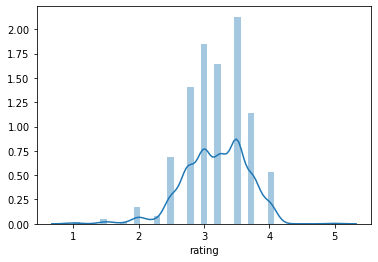

In [24]:
# Ratings distribution

sns.distplot(chocolate_reviews['rating'])

This plot indicates that the majority of chocolate bars reviewed in the Flavors of Cocoa database tend to have a rating between 2.5 and 4. Can you identify the distribution here?

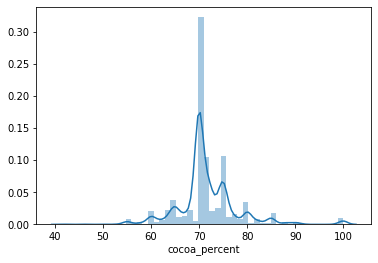

In [25]:
# Cocoa percentage distribution

sns.distplot(chocolate_reviews['cocoa_percent'])

As we can tell from this plot, a very large proportion of chocolate bars rated have around 70% cocoa. We may want to ask whether this sample is representative of chocolate bars on the market in general, or whether reviewers favor such bars because they expect them to be more enjoyable. (i.e. Is our sample representatitive of the population?)

### Rating distributions by chocolate bar attributes

We can then plot ratings distributions by bean type, bean origin or maker country origin.

In these examples, we use box plots (a.k.a., box and whisker plots), which show the distribution across categories. These plots are informative as they display a five-number summary of a dataset, including its:

1.   Minimum
1.   First quartile (about 25% of the numbers in the dataset lie below it)
1.   Median (splits the dataset in half)
1.   Third quartile (about 75% of the numbers in the dataset lie below it)
1.   Maximum



Text(0.5, 1.0, 'Ratings distribution by bean_type')

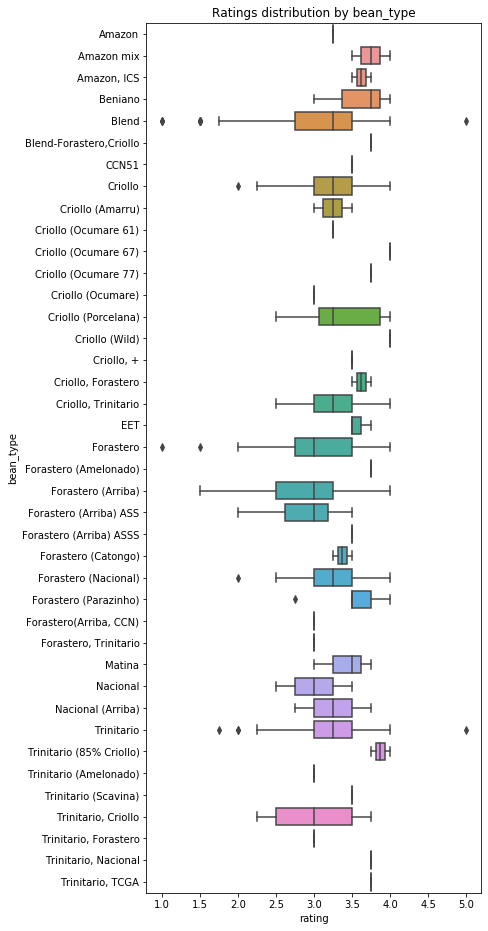

In [26]:
# By bean type

fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate_reviews,
    y='bean_type',
    x='rating',
    order = sorted(chocolate_reviews.bean_type.unique()),
)
ax.set_title('Ratings distribution by bean_type')

Text(0.5, 1.0, 'Ratings distribution by bean origin; note: this includes blended bars')

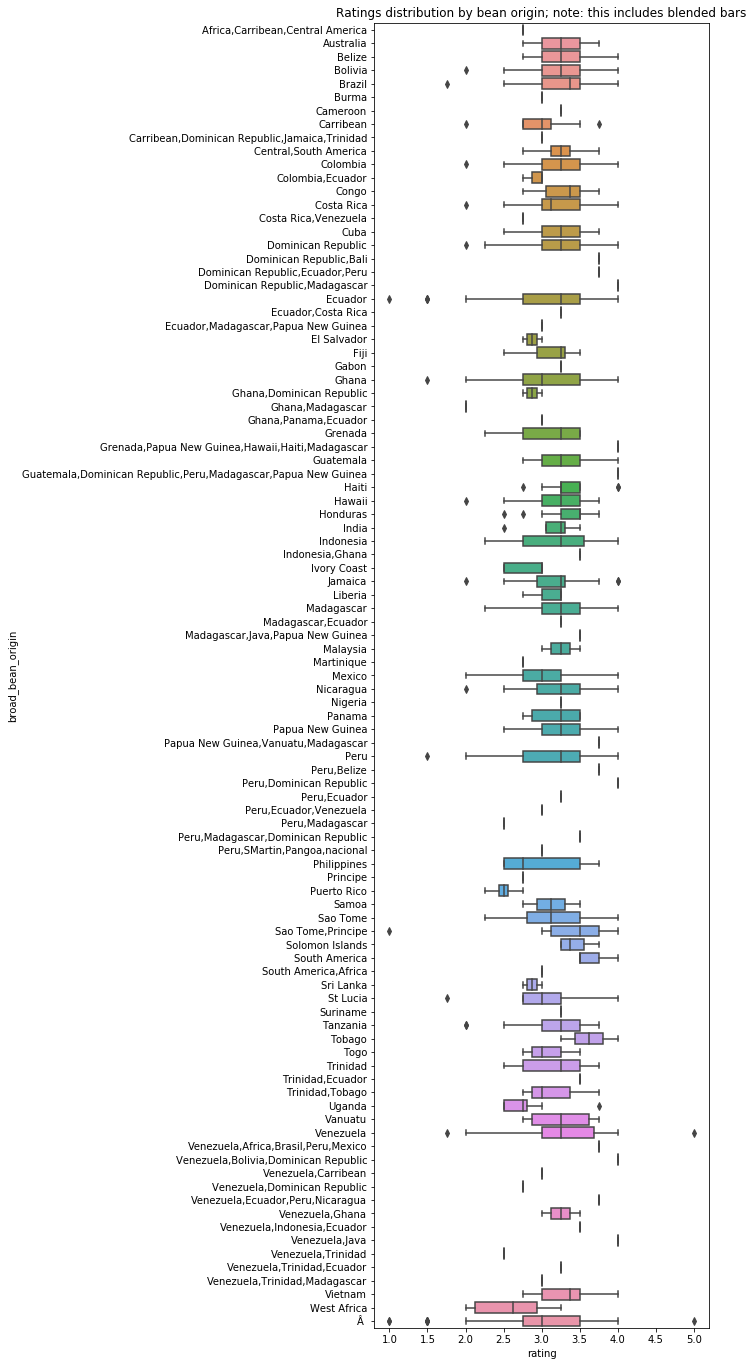

In [27]:
# By bean origin

fig, ax = plt.subplots(figsize=[6, 24])
sns.boxplot(
    data=chocolate_reviews,
    y='broad_bean_origin',
    x='rating',
    order = sorted(chocolate_reviews.broad_bean_origin.unique()),
)
ax.set_title('Ratings distribution by bean origin; note: this includes blended bars')

Text(0.5, 1.0, 'Ratings distribution by maker location')

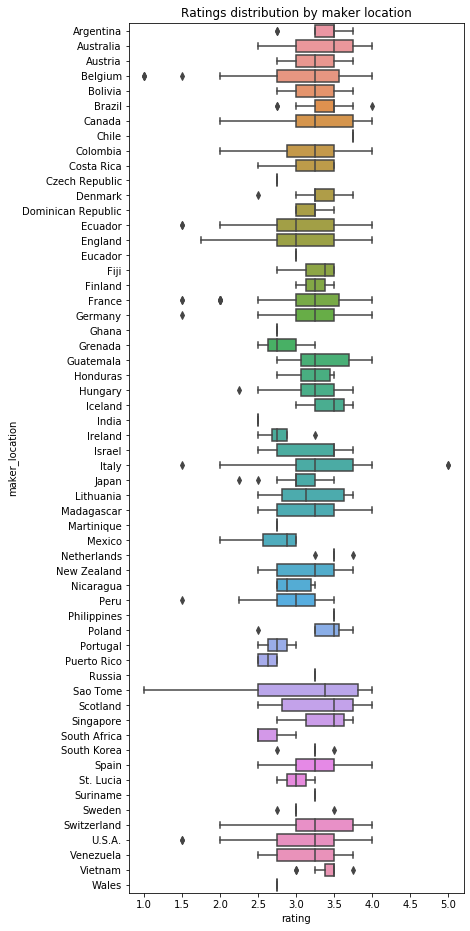

In [28]:
# By maker location

fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate_reviews,
    y='maker_location',
    x='rating',
    order = sorted(chocolate_reviews.maker_location.unique()),
)
ax.set_title('Ratings distribution by maker location')

### Alternate plot types

Alternatively, we can use a swarm plot to display the data. The swarm plot is a generalization of a scatterplot in which one variable is categorical, and each scatterplot point is placed on the categorical axis using an algorithm that avoids overlapping points. A swarm plot may be a good option when wanting to see the distribution of individual values. However, this type of plot may not be as helpful when working with a very large dataset, as individual points may be harder to see.

Text(0.5, 1.0, 'Ratings distribution by maker_location')

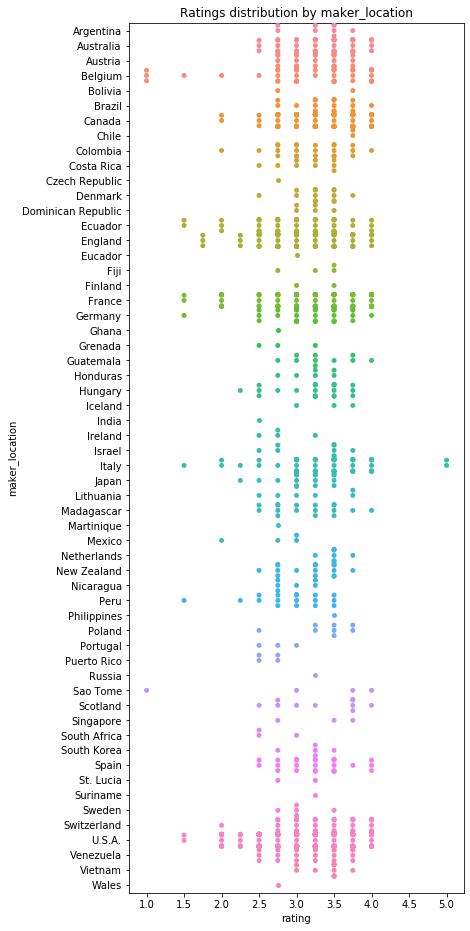

In [29]:
# By maker_location: swarm plot

fig, ax = plt.subplots(figsize=[6, 16])
sns.swarmplot(
    x="rating",
    y="maker_location",
    order = sorted(chocolate_reviews.maker_location.unique()),
    data=chocolate_reviews);
ax.set_title('Ratings distribution by maker_location')

Another helpful type of plot for displaying categorical values' distribution is a violin plot, which combines a boxplot with a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation).

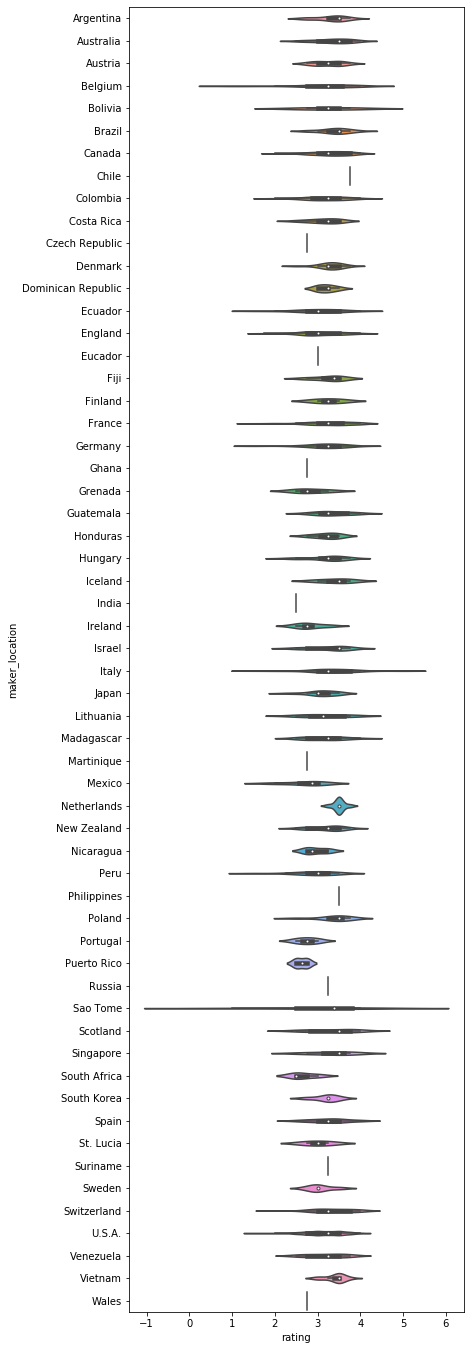

In [30]:
# By maker_location: violin plot

fig, ax = plt.subplots(figsize=[6, 24])
sns.violinplot(
    x="rating",
    y="maker_location",
    order = sorted(chocolate_reviews.maker_location.unique()),
    data=chocolate_reviews);

## 8. Examining characteristics of top rated chocolate bars

Now that we've looked at our entire sample, we may wish to examine the properties of top rated chocolate bars. Here are some questions we may wish to ask:

*   Which makers have the highest average rating on chocolate bars they've produced?
*   Where are these markers located?
*   What are the bean types (or blends) used in top chocolate bars?
*   What are the bean origins of top rated chocolate bars?



In [31]:
# Show top 10 rated maker locations

chocolate_reviews.groupby('maker_location')[['rating']].mean().sort_values(by='rating', ascending=False).head(10)

,rating
maker_location,
Chile,3.750000
Philippines,3.500000
Netherlands,3.500000
Iceland,3.416667
Vietnam,3.409091
Brazil,3.397059
Poland,3.375000
Australia,3.357143
Guatemala,3.350000


In [32]:
# Show top 10 rated broad bean origins

chocolate_reviews.groupby('broad_bean_origin')[['rating']].mean().sort_values(by='rating', ascending=False).head(10)

,rating
broad_bean_origin,
"Venezuela,Java",4.00
"Dominican Republic,Madagascar",4.00
"Venezuela,Bolivia,Dominican Republic",4.00
"Guatemala,Dominican Republic,Peru,Madagascar,Papua New Guinea",4.00
"Grenada,Papua New Guinea,Hawaii,Haiti,Madagascar",4.00
"Peru,Dominican Republic",4.00
"Venezuela,Africa,Brasil,Peru,Mexico",3.75
"Dominican Republic,Ecuador,Peru",3.75
"Papua New Guinea,Vanuatu,Madagascar",3.75


In [33]:
# Show top 10 rated specific bean origins

chocolate_reviews.groupby('specific_bean_origin')[['rating']].mean().sort_values(by='rating', ascending=False).head(10)

,rating
specific_bean_origin,
Toscano Black,4.166667
"Porcelana,Zulia",4.000000
Asante,4.000000
San Juan de Cheni,4.000000
"Ocumare,Puerto Cabello,Venezuela",4.000000
"Ocumare,Puerto Cabello",4.000000
Guayas,4.000000
"Ocumare 67,Puertofino",4.000000
Corona Arriba,4.000000


In [34]:
# Show top 10 rated bean types

chocolate_reviews.groupby('bean_type')[['rating']].mean().sort_values(by='rating', ascending=False).head(10)

,rating
bean_type,
Criollo (Ocumare 67),4.000
Criollo (Wild),4.000
Trinitario (85% Criollo),3.875
Forastero (Amelonado),3.750
"Trinitario, Nacional",3.750
Amazon mix,3.750
Criollo (Ocumare 77),3.750
"Trinitario, TCGA",3.750
"Blend-Forastero,Criollo",3.750


In [35]:
# Show top 10 rated makers

chocolate_reviews.groupby('maker')[['rating']].mean().sort_values(by='rating', ascending=False).head(10)

,rating
maker,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
Patric,3.791667
Idilio (Felchlin),3.775000
Obolo,3.750000
Un Dimanche A Paris,3.750000


## 9. Mapping chocolate bars across the world

Where do the cocoa beans used in top rated chocolate bars tend to come from? Where are the chocolate bar makers with the highest average chocolate bar rating located?

For each of these questions, we'd like to plot a map of chocolate bars across the world.

Before we can do this, however, we need to do a bit more work. We do have the cocoa beans' country of origin information (**broad_bean_origin**), but we do not have geographic information needed for the plot, such as longitude and latitude of the countries.

Luckily, this geographic information is available in another table on developer.google.com! The [dataset Publishing Language (DSPL) Countries table](https://developers.google.com/public-data/docs/canonical/countries_csv) can be joined with our chocolate reviews table, using the country name as the key.

Let get the dataset by [opening the countries lat long csv](https://storage.googleapis.com/amli/public/countries_lat_long_info.csv) file.

  * Download and save a copy on your computer.
  * Upload the file into the colab runtime
    * Click on the __Choose Files__ button to specify the name of the file to be uploaded
  * Using pandas module to read the dataset into a pandas dataframe.



In [37]:
# Read the dataset into a pandas dataframe

dataset_filename = "./countries_lat_long_info.csv"

countries_info = pd.read_csv(dataset_filename, encoding='latin-1')

In [38]:
# Inspect a few examples

countries_info.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


### Maker location

We can then look at chocolate maker locations as well:

In [39]:
# Join the chocolate review and geographic information tables on maker country name

mappable_ratings = pd.merge(chocolate_reviews, countries_info, left_on='maker_location', right_on='name')

We're now ready to plot our map of chocolate bars across the world!

In [40]:
# Draw a scatter plot to visualize average chocolate bar ratings by maker location

alt.Chart(mappable_ratings).mark_point().encode(
    x='longitude',
    y='latitude',
    size='rating',
    tooltip=['broad_bean_origin', 'maker', 'cocoa_percent', 'rating', 'specific_bean_origin', 'country', 'maker_location', 'name', 'bean_type', 'longitude', 'latitude']
).interactive()

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


**Observation**

Do you notice a pattern here? A map of South America is emerging, as well as clusters of ratings in other parts of the world!


**Note**: This scatter plot is interactive. Hover over the bubbles to see details about that point on the map. Here's an example:

![map_hover](https://storage.googleapis.com/amli/public/south_america_map.png)

You can also grab the "map" and move it up/down/left/right if needed.

### Bean origin

In [41]:
# Join the chocolate review and geographic information tables on bean country of origin

mappable_ratings_origin = pd.merge(chocolate_reviews, countries_info, left_on='broad_bean_origin', right_on='name')

In [42]:
# Draw a scatter plot to visualize average chocolate bar ratings by bean country of origin

alt.Chart(mappable_ratings_origin).mark_point().encode(
    x='longitude',
    y='latitude',
    size='rating',
    tooltip=['broad_bean_origin', 'maker', 'cocoa_percent', 'rating', 'specific_bean_origin', 'country', 'maker_location', 'name', 'bean_type', 'longitude', 'latitude']
).interactive()

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


**Observation**

Just as in our earlier scatter plot, some map properties emerge here as well.

## 10. Looking for correlations

Now that we've looked at each of our dataset's fields, computed some basic statistics and plotted distributions, let's check whether a chocolate bar's features may be related to a high rating.

We can start by creating a simple heatmap for all numeric features in our dataset:

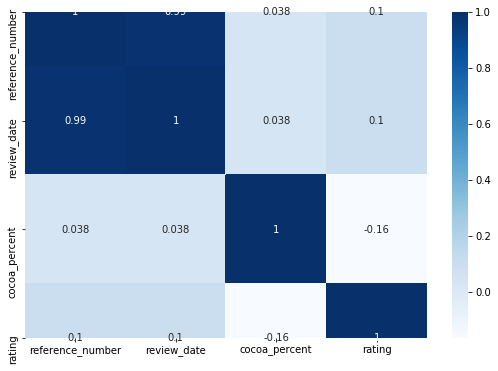

In [43]:
# Show heatmap

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(chocolate_reviews.corr(), cmap="Blues", annot=True, ax=ax)

Unfortunately, this heatmap seems to tell us only that **reference_number** and **review_date** are highly correlated. This makes sense, because a higher reference number value indicates a more recent review, but this insight does not tell us anything important. Furthermore, the heatmap does not provide any insights on what makes a highly-rated chocolate bar. We see only that **cocoa_percent** is likely not a strong indicator of rating.

Let's look at our other features instead. To plot a full heatmap for all features, we'll have to do a little more work. Most of the other fields of interest (e.g., **bean_type**, **broad_bean_origin**, **specific_bean_origin**, **maker, maker_location**) are all string objects, so we'll need to convert them to numeric values. Since they are categorical values, we can change their encoding so they are represented as integers.

In [44]:
# Convert string objects to categories

chocolate_reviews['bean_type'] = chocolate_reviews['bean_type'].astype('category')
chocolate_reviews['broad_bean_origin'] = chocolate_reviews['broad_bean_origin'].astype('category')
chocolate_reviews['specific_bean_origin'] = chocolate_reviews['specific_bean_origin'].astype('category')
chocolate_reviews['maker_location'] = chocolate_reviews['maker_location'].astype('category')
chocolate_reviews['maker'] = chocolate_reviews['maker'].astype('category')
chocolate_reviews.dtypes

maker                   category
specific_bean_origin    category
reference_number           int64
review_date                int64
cocoa_percent            float64
maker_location          category
rating                   float64
bean_type               category
broad_bean_origin       category
dtype: object

We can now try to display our heatmap again:

In [45]:
#@title Convert the categories to numeric codes
cat_columns = chocolate_reviews.select_dtypes(['category']).columns
chocolate_reviews[cat_columns] = chocolate_reviews[cat_columns].apply(lambda x: x.cat.codes)

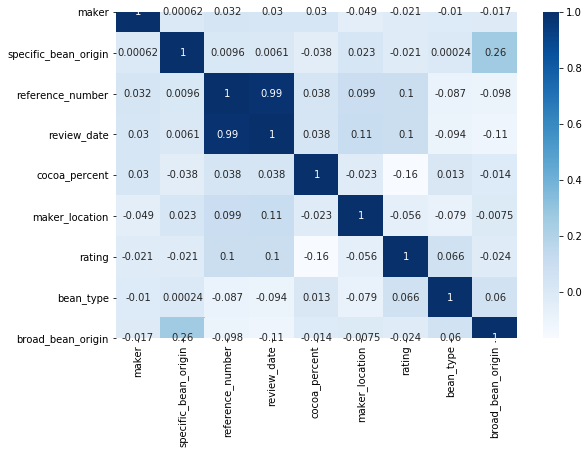

In [46]:
# Show heatmap

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(chocolate_reviews.corr(), cmap="Blues", annot=True, ax=ax)

**Observations**

We can now see the other features, but none of them individually seems to be strongly correlated with the rating. In fact, the only notable observation is that **rating** is inversely correlated with the value of **cocoa_percent** at -0.16, which is still not that strong an indicator. However, this result is not entirely surprising if we look back at some of our earlier plots!

In particular, recall the chocolate bar distribution by **cocoa_percent**:

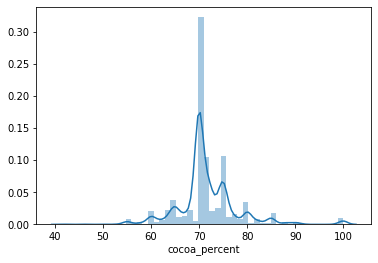

In [47]:
# Cocoa percent distribution

sns.distplot(chocolate_reviews['cocoa_percent'])

And the top chocolate bars' **cocoa_percent** values:

In [48]:
# Get average rating per cocoa percentage category: 0 to 60, 61 to 70, 71 to 80, 81 to 90, 91 to 100

cocoa_percent_bins = [0, 60, 70, 80, 90, 100]

#Convert numeric cocoa percentage values to categories: (0-60], (60-70], (70-80], (80-90], (91-100]
cocoa_percent_bins = [0, 60, 70, 80, 90, 100]
cocoa_percent_cat_names = ['<60', '70', '80', '90', '>90']
cocoa_percent_cats = pd.cut(chocolate_reviews['cocoa_percent'], cocoa_percent_bins, labels=cocoa_percent_cat_names)
chocolate_reviews['cocoa_percent'] = cocoa_percent_cats

# Get top rated cocoa percentage categories
chocolate_reviews.groupby('cocoa_percent')[['rating']].mean().sort_values(by='rating', ascending=False).head(10)

,rating
cocoa_percent,
70,3.268629
80,3.153143
90,3.000000
<60,2.979730
>90,2.270000


As we can tell from the results above, on average, chocolate bars with ~70% cocoa are among the most frequently top rated. Furthermore, a majority of bars do seem to contain 70-80% cocoa:

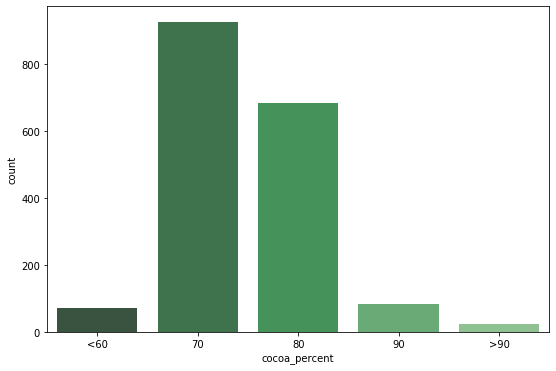

In [49]:
# Plot cocoa_percent distribution

f, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x="cocoa_percent", data=chocolate_reviews, palette="Greens_d");

**Observations**

As we can tell from the average rating per **cocoa_percent** category, **rating** and **cocoa_percent** do not increase/decrease together. One hypothesis is that chocolate bar ratings increase with the cocoa content *up to a certain point* (80% +/- 10), after which a lower-content bar might be better than a very high content one.